In [1]:
import pandas as pd
import matplotlib.pyplot as matplot
import seaborn as seb
import numpy as np
import csv as csv
%matplotlib inline

#high resolution output
%config InLineBackend.figure_format = 'retina'

# importing the models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#importing model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
heartdf = pd.read_csv("heart.csv", ',')
heartdf

C:\Users\shawr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#checking the type of file
type(heartdf)

pandas.core.frame.DataFrame

In [4]:
#displying all the columns present in the dataset
heartdf.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
#describing the dataset
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#cheking the shape of file
heartdf.shape

(303, 14)

In [7]:
#describing the file
heartdf.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#checking the number of times has the appeared in the categorical columns of our dataset
heartdf.output.value_counts()
#this gives us the positives(1) and negatives (0) values are present in our dataset

1    165
0    138
Name: output, dtype: int64

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

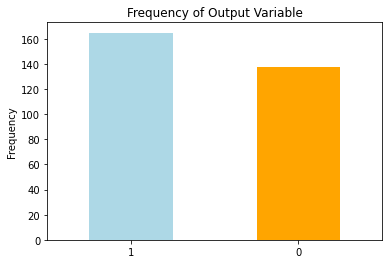

In [14]:
#ploting the postives and negatives
heartdf.output.value_counts().plot(kind='bar', color=['lightblue', 'orange'])

matplot.title("Frequency of Output Variable")
matplot.ylabel("Frequency")
matplot.xticks(rotation=0)

In [11]:
#checking for missing values in the dataset using either one
heartdf.isna().sum()
#readingdatafile.isnull().sum()

#the below output specifies that there are no missing values in the dataset

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [12]:
#checking the number of male and female in the dataframe with the chances of occurance of heart attack
pd.crosstab(heartdf.output, heartdf.sex)

# we can observe that there are 100 females out of whom 72 women have heartattack this specifies that there is 
#75%chances of heartattack, as far as men are concerned there are 93 men out of 207 who have heartattack, 
#which means is 50% chances of heartattack

sex,0,1
output,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

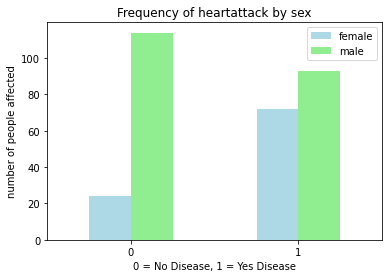

In [13]:
#visualizing it for better understanding
pd.crosstab(heartdf.output, heartdf.sex).plot(kind='bar', color=['lightblue', 'lightgreen'])

matplot.title("Frequency of heartattack by sex")
matplot.xlabel("0 = No Disease, 1 = Yes Disease")
matplot.ylabel("number of people affected")
matplot.legend(['female', 'male'])
matplot.xticks(rotation=0)

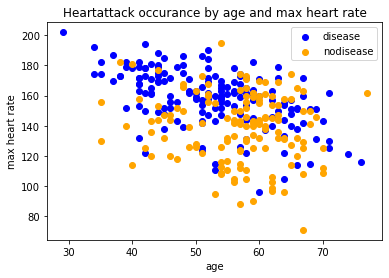

In [15]:
#now we shall compare the 2 independent variables(age, thalachh(max heart rate)) for occurance of heartattack
#for which we are using the scatterplot, scattering with 0(neagtive),1(positive)
matplot.scatter(heartdf.age[heartdf.output == 1], heartdf.thalachh[
    heartdf.output == 1], c = "blue")
matplot.scatter(heartdf.age[heartdf.output == 0], heartdf.thalachh[
    heartdf.output == 0], c = "orange")

matplot.title("Heartattack occurance by age and max heart rate")
matplot.xlabel("age")
matplot.ylabel("max heart rate")
matplot.legend(['disease', 'nodisease'])


#from the below graph we can describe that the occurance of heart attack is more in the age group below 53

<AxesSubplot:ylabel='Frequency'>

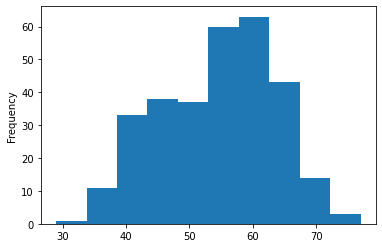

In [16]:
# let us check the age distribution in our datafile

heartdf.age.plot.hist()


#from this we can observe the age group in the datafile is more between 55 to 63-64

In [17]:
# let us also check the occurance of heart attack by chest pain (cp)
#performing the above analysis for cp
pd.crosstab(heartdf.output, heartdf.cp)


#here let us understand what is cp and its values
#        cp 0: typical angina - chest pain due to excess physical/emotional stress
#        cp 1: atypical angina - this not realted to heart
#        cp 2: non-aginan pain - pain in chest not caused due to heart/heartattack
#        cp 3: asymptomatic - pain not showing any signs of having a disease

#now let us see the correlation between output with chest pain
#as per the below matrix we can figure that type 2(non-aginan pain has the highest occurance)

cp,0,1,2,3
output,,,,
0,104,9,18,7
1,39,41,69,16


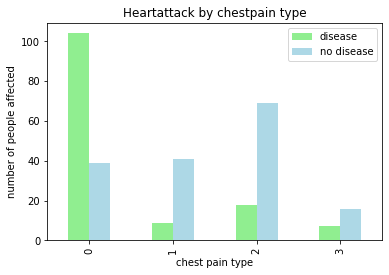

In [18]:
#let us take a look at it visually now
pd.crosstab(heartdf.cp, heartdf.output).plot(kind='bar', color=['lightgreen', 'lightblue'])

matplot.title("Heartattack by chestpain type")
matplot.xlabel("chest pain type")
matplot.ylabel("number of people affected")
matplot.legend(['disease', 'no disease'])

In [19]:
#correlation between independent variables

corr_matrix = heartdf.corr()
corr_matrix

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


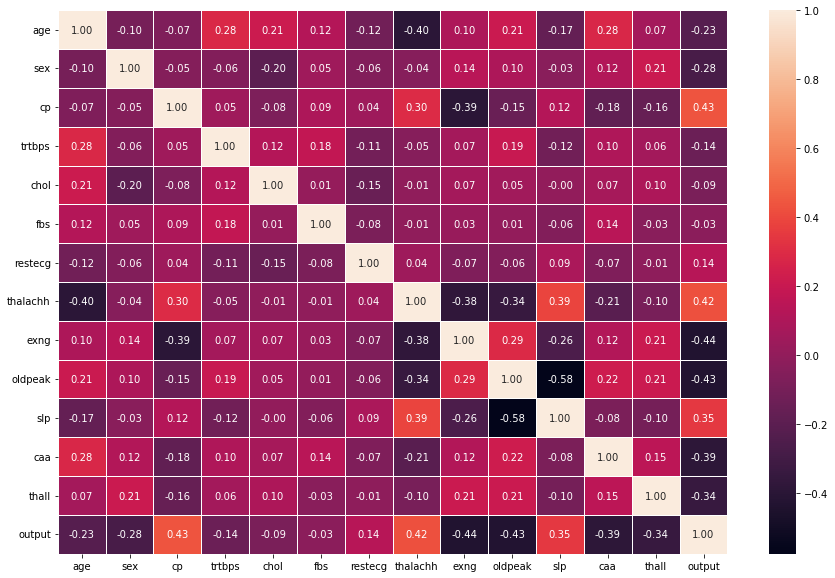

In [20]:
#plotting the corr matrix using seaborn heat map
corr_matrix = heartdf.corr()
fig, heatmp = matplot.subplots(figsize=(15,10))
heatmp = seb.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt='.2f')

#legend of the heatmap:
#  annot=true - to add coefficient values in each cells
#  fmt - formating the cell text by decimal notation (here it is 2 decimals after .)

In [21]:
#in order to model the data we shall drop the output col and take it as the y variable

X = heartdf.drop('output', axis=1)
Y = heartdf['output']

In [22]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [25]:
# we shall now segregate our data into training and testing data

#random seed
np.random.seed(30)

#spliting the data into training and testing set
X_traind, X_testd, Y_traind, Y_testd = train_test_split(
    X, # independent variables
    Y, # dependent variables
    test_size = 0.2 # %of test split data
)

In [26]:
X_traind.head()

# here we can see that it randomly takes training data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2


In [27]:
np.array(Y_traind), len(Y_traind)

# here we can observe that we are having 242 samples for training(since y is output(that is occurance 
#of heartattack) the data below is in form of 0,1)

(array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0],
       dtype=int64),
 242)

In [28]:
np.array(Y_testd), len(Y_testd)

#this specifies the testing data that we are working on which is 61 records

(array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64),
 61)

In [29]:
# for modelling our training and testing data we shall compare 
#Logistic Regression - LogisticRegression()
#K-Nearest Neighbor - KNeighborsClassifier()
#RandomForest - RandomForestClassifier()

#specifying all in one keyword(dictionary)

models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

#creating a defination(function) to fit and score the models

def fit_and_score(models, X_traind, X_testd, Y_traind, Y_testd):
    np.random.seed(32)
    #creating a list modelscores
    model_score = {}
    for name, model in models.items():
        #fitting the model
        model.fit(X_traind, Y_traind)
        #evaluating model and appending it's score = model_score
        model_score[name] = model.score(X_testd, Y_testd)
    return model_score

In [30]:
model_score = fit_and_score(models=models,
                           X_traind=X_traind,
                           X_testd=X_testd,
                           Y_traind=Y_traind,
                           Y_testd=Y_testd)
model_score

# here we get the %of model fitting(the output% of our model representing how good it is)

C:\Users\shawr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6065573770491803,
 'Logistic Regression': 0.8524590163934426,
 'Random Forest': 0.8032786885245902}

# KNN model

In [31]:
#creating a list of training, testing scores

train_score = []
test_score = []

#specifying a range for knn
neighbor = range(1,15)

#knn algo
knn = KNeighborsClassifier()

for i in neighbor:
    knn.set_params(n_neighbors=i)
    
    #fitting data
    knn.fit(X_traind, Y_traind)
    
    #training scores
    train_score.append(knn.score(X_traind, Y_traind))
    
    #testing scores
    test_score.append(knn.score(X_testd, Y_testd))

In [32]:
#display train data
train_score

[1.0,
 0.8264462809917356,
 0.7851239669421488,
 0.7727272727272727,
 0.7851239669421488,
 0.8099173553719008,
 0.7603305785123967,
 0.7272727272727273,
 0.731404958677686,
 0.7272727272727273,
 0.7355371900826446,
 0.7148760330578512,
 0.743801652892562,
 0.7066115702479339]

In [33]:
#display test data
test_score

[0.5409836065573771,
 0.4918032786885246,
 0.5737704918032787,
 0.5573770491803278,
 0.6065573770491803,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6065573770491803,
 0.6229508196721312,
 0.6229508196721312,
 0.5901639344262295]

max knn score: 62.30%


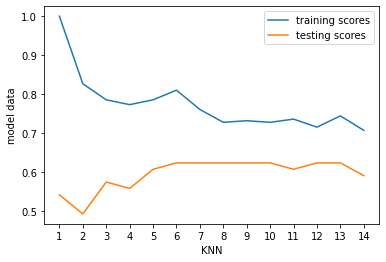

In [35]:
#ploting the test, train data for clear understanding
matplot.plot(neighbor, train_score, label = "training scores")
matplot.plot(neighbor, test_score, label = "testing scores")
matplot.xticks(np.arange(1, 15, 1))
matplot.xlabel("KNN")
matplot.ylabel("model data")
matplot.legend()
print(f"max knn score: {max(test_score)*100:.2f}%")

# here we get knn-6 seems best

# Logistic Regression using RandomizedSearchCV

In [36]:
#creating a parameter for LR

lrgrid = {"C": np.logspace(-4, 4, 20),
          "solver": ['liblinear']
}

In [37]:
#tuning LR
#random seed
np.random.seed()
#random parameter for LR
lr_randsd = RandomizedSearchCV(LogisticRegression(), param_distributions = lrgrid, cv=5, n_iter=20, verbose=True)
#fit random parameter for LR
lr_randsd.fit(X_traind, Y_traind);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [38]:
lr_randsd.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [39]:
lr_randsd.score(X_testd, Y_testd)

0.819672131147541

In [40]:
# Different hyperparameters for our LogisticRegression model
logreg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_lr = GridSearchCV(LogisticRegression(),
                         param_grid=logreg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_lr.fit(X_traind, Y_traind);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [41]:
# Check the best hyperparameters
gs_lr.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [42]:
# Evaluate the grid search LogisticRegression model
gs_lr.score(X_testd, Y_testd)

0.8360655737704918

In [43]:
# Make predictions with tuned model
y_preds = gs_lr.predict(X_testd)

In [44]:
y_preds

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [45]:
np.array(Y_testd)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

C:\Users\shawr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


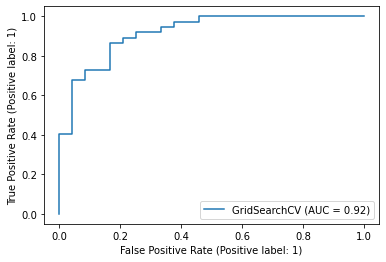

In [46]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_lr, X_testd, Y_testd)

In [47]:
# Confusion matrix
print(confusion_matrix(Y_testd, y_preds))

[[20  4]
 [ 6 31]]


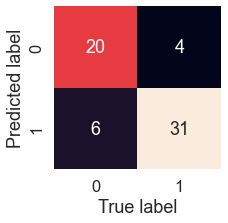

In [48]:
seb.set(font_scale=1.5)

def plot_conf_mat(Y_testd, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap()
    """
    fig, ax = matplot.subplots(figsize=(3, 3))
    ax = seb.heatmap(confusion_matrix(Y_testd, y_preds),
                     annot=True,
                     cbar=False)
    matplot.xlabel("True label")
    matplot.ylabel("Predicted label")
    
plot_conf_mat(Y_testd, y_preds)

In [49]:
print(classification_report(Y_testd, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.89      0.84      0.86        37

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



In [50]:
#check best hyperparameters
gs_lr.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [51]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.1082636733874054,
                        solver="liblinear")

In [52]:
# Cross-validates accuracy
cv_acc = cross_val_score(clf,
                        X,
                        Y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.86666667, 0.75      ])

In [53]:
cv_acc = np.mean(cv_acc)
cv_acc

0.834808743169399

In [54]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                        X,
                        Y,
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8182683982683983

In [55]:
# Cross-validated recall
cv_recall = cross_val_score(clf, 
                           X,
                           Y,
                           cv=5,
                           scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9030303030303031

In [56]:
# Cross_validated F1-score
cv_f1 = cross_val_score(clf,
                       X,
                       Y,
                       cv=5,
                       scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8572876223964057

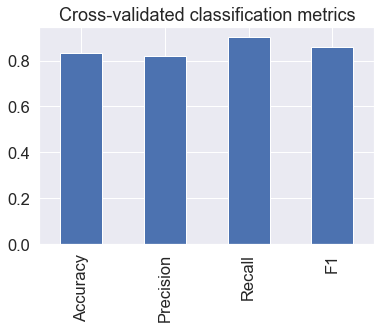

In [57]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);

In [58]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

clf.fit(X_traind, Y_traind);

In [59]:
# Check coef_
clf.coef_

array([[ 0.01217699, -0.83207161,  0.72711829, -0.01614018, -0.00363589,
        -0.12052036,  0.22413882,  0.02652973, -0.53300924, -0.50120811,
         0.48339966, -0.66492627, -0.62286398]])

In [60]:
# Match coef's of feature to columns
feature_dict = dict(zip(heartdf.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.01217698866732675,
 'sex': -0.8320716055540927,
 'cp': 0.7271182883905101,
 'trtbps': -0.01614018411626346,
 'chol': -0.0036358876203720736,
 'fbs': -0.1205203647087248,
 'restecg': 0.22413882275841873,
 'thalachh': 0.026529725965544593,
 'exng': -0.5330092365097158,
 'oldpeak': -0.5012081079271923,
 'slp': 0.48339965664663925,
 'caa': -0.6649262685942597,
 'thall': -0.622863984510406}

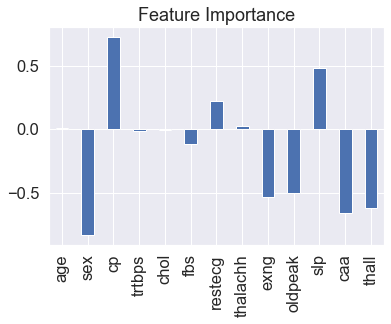

In [61]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [62]:
pd.crosstab(heartdf["sex"], heartdf["output"])

output,0,1
sex,,
0,24,72
1,114,93


In [63]:
pd.crosstab(heartdf["slp"], heartdf["output"])

output,0,1
slp,,
0,12,9
1,91,49
2,35,107


# Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB
nbclassifier = GaussianNB()
nbclassifier.fit(X_traind, Y_traind)

GaussianNB()

In [66]:
y_prednb  =  nbclassifier.predict(X_testd)

In [67]:
y_prednb

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [68]:
Y_testd

97     1
122    1
84     1
231    0
110    1
      ..
273    0
165    0
51     1
285    0
234    0
Name: output, Length: 61, dtype: int64

In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score
cmnb = confusion_matrix(Y_testd, y_prednb)
acnb = accuracy_score(Y_testd,y_prednb)
acnb

0.7704918032786885

In [73]:
cmnb

array([[20,  4],
       [10, 27]], dtype=int64)

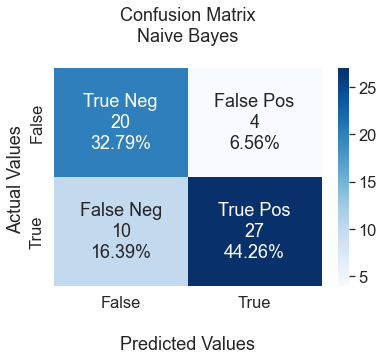

In [102]:
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cmnb.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cmnb.flatten()/np.sum(cmnb)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cmnb, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\nNaive Bayes\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Random Forest

In [89]:
model4 = RandomForestClassifier()
model4.fit(X_traind,Y_traind)
Y_pred_randomf = model4.predict(X_testd)

print(classification_report(Y_testd,Y_pred_randomf))
print('Accuracy of the model')
print(accuracy_score(Y_testd,Y_pred_randomf))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78        24
           1       0.90      0.76      0.82        37

    accuracy                           0.80        61
   macro avg       0.80      0.82      0.80        61
weighted avg       0.82      0.80      0.81        61

Accuracy of the model
0.8032786885245902


In [90]:
def importantFeatures(X_traind, rf):
    names = list(X_traind.columns)
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    new_indices = indices[:20]
    features = X_traind.columns[indices]
    indices = rf.feature_importances_[indices]
    f1 = features
    i1 = indices
    features = list(features[:20])
    indices = list(indices[:20])
    return features, indices, f1, i1

In [91]:
def featurePlot(features, indices, X_traind, X_testd, Y_traind, Y_testd):
    acc = []
    for i in range(1, 25):
        x = X_traind[features[:i]]
        R = RandomForestClassifier()
        R.fit(x, Y_traind)
        xtest = X_testd[features[:i]]
        y_pred = R.predict(xtest)
        acc1 = accuracy_score(y_pred, Y_testd)
        print(features[:i])
        print(acc1)
        acc.append(acc1)
    return acc

In [92]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
def plotFeatureImportance(features, indices):
    figure(figsize=(8, 6), dpi=80)
    x1 = [i for i in features[::-1]]
    x2 = [i for i in indices[::-1]]
    plt.barh(x1, x2, align = 'center')
    #plt.yticks(range(n), [features[i] for i in indices[-n:]])
    #plt.xticks([0, 0.0025, 0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175, 0.02, 0.0225, 0.025])
    plt.xlabel('Relative Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance plot')

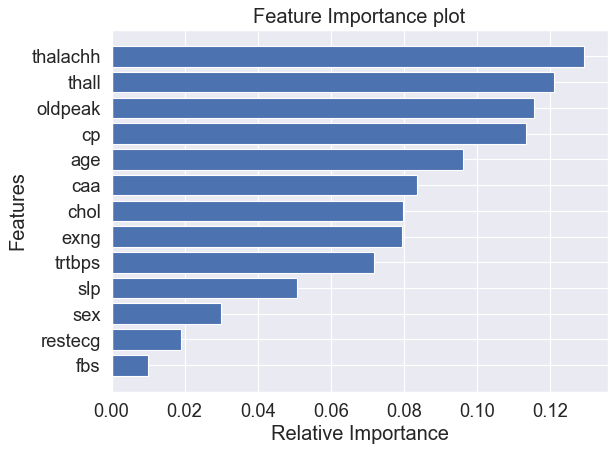

In [93]:
features, indices, f1, i1 = importantFeatures(X_traind, model4)
plotFeatureImportance(features, indices)